In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sodapy import Socrata


https://data.cityofnewyork.us/Health/DOHMH-New-York-City-Restaurant-Inspection-Results/43nn-pn8j

In [35]:
client = Socrata("data.cityofnewyork.us", None)
results = client.get("43nn-pn8j", limit=500000)
results_df = pd.DataFrame.from_records(results)

In [36]:
# restaurants = pd.read_csv('DOHMH_New_York_City_Restaurant_Inspection_Results.csv')
restaurants = results_df.drop(['bin', 'bbl','nta','phone','census_tract','council_district','community_board' ], axis = 1)
restaurants.head()

,camis,dba,boro,building,street,zipcode,cuisine_description,inspection_date,action,violation_code,violation_description,critical_flag,score,record_date,inspection_type,latitude,longitude,grade,grade_date
0,50075379,BATTLE HILL TAVERN,Brooklyn,686,6TH AVE,11215,Pizza/Italian,2018-05-31T00:00:00.000,Violations were cited in the following area(s).,06F,Wiping cloths soiled or not stored in sanitizi...,Y,12,2020-04-03T06:01:38.000,Pre-permit (Operational) / Initial Inspection,40.660102061056,-73.99113704192,NaN,NaN
1,50092762,TESSEY'S INTERNATIONAL KITCHEN,Bronx,2542B,WHITE PLAINS RD,10467,Soul Food,2019-06-05T00:00:00.000,Violations were cited in the following area(s).,10B,Plumbing not properly installed or maintained;...,N,8,2020-04-03T06:01:38.000,Pre-permit (Non-operational) / Initial Inspection,40.863867998459,-73.867391431519,NaN,NaN
2,50018589,ZHEN GOOD TASTE,Queens,5961,69TH ST,11378,Chinese,2017-12-12T00:00:00.000,Violations were cited in the following area(s).,06D,"Food contact surface not properly washed, rins...",Y,10,2020-04-03T06:01:38.000,Cycle Inspection / Re-inspection,40.721837387655,-73.893054937639,A,2017-12-12T00:00:00.000
3,41615409,HOT KITCHEN,Manhattan,104,2 AVENUE,10003,Chinese,2017-04-25T00:00:00.000,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,N,12,2020-04-03T06:01:38.000,Cycle Inspection / Initial Inspection,40.727477757409,-73.988465378159,A,2017-04-25T00:00:00.000
4,50037013,EMBERS RESTAURANT,Brooklyn,9519,3RD AVE,11209,Steak,2019-10-16T00:00:00.000,Violations were cited in the following area(s).,04N,Filth flies or food/refuse/sewage-associated (...,Y,52,2020-04-03T06:01:38.000,Cycle Inspection / Initial Inspection,40.617037314894,-74.033674718848,NaN,NaN


In [37]:
restaurants.columns

Index(['camis', 'dba', 'boro', 'building', 'street', 'zipcode',
       'cuisine_description', 'inspection_date', 'action', 'violation_code',
       'violation_description', 'critical_flag', 'score', 'record_date',
       'inspection_type', 'latitude', 'longitude', 'grade', 'grade_date'],
      dtype='object')

‘A’ — indicates a score of 0–13 \
‘B’ — indicates a score of 14–27 \
‘C’ — indicates a score of greater than 27 \
‘Grade Pending’ — indicates the restaurant received an ‘B’ or a ‘C’ and is contesting the grade. \
if the restaurant recieve more than 28 score, then the resturant will be closed until next inspection
https://www.nytimes.com/2017/05/17/nyregion/new-york-today-what-do-restaurant-grades-mean.html \
https://data.cityofnewyork.us/Health/DOHMH-New-York-City-Restaurant-Inspection-Results/43nn-pn8j \
https://docs.google.com/presentation/d/1pSC0NFqhwqRO36UCAgwElhfs5zsi28Bk-fI0yPt6peU/edit#slide=id.g6df4927a1c_0_10

In [38]:
# restaurants[restaurants.score >= 28]
restaurants['score'] = restaurants['score'].astype(float)
restaurants['close'] = restaurants['score'].apply(lambda x: 1 if x > 27 else 0)

In [43]:
restaurants.head(3)

,camis,dba,boro,building,street,zipcode,cuisine_description,inspection_date,action,violation_code,violation_description,critical_flag,score,record_date,inspection_type,latitude,longitude,grade,grade_date,close
0,50075379,BATTLE HILL TAVERN,Brooklyn,686,6TH AVE,11215,Pizza/Italian,2018-05-31T00:00:00.000,Violations were cited in the following area(s).,06F,Wiping cloths soiled or not stored in sanitizi...,Y,12.0,2020-04-03T06:01:38.000,Pre-permit (Operational) / Initial Inspection,40.660102061056,-73.99113704192,NaN,NaN,0
1,50092762,TESSEY'S INTERNATIONAL KITCHEN,Bronx,2542B,WHITE PLAINS RD,10467,Soul Food,2019-06-05T00:00:00.000,Violations were cited in the following area(s).,10B,Plumbing not properly installed or maintained;...,N,8.0,2020-04-03T06:01:38.000,Pre-permit (Non-operational) / Initial Inspection,40.863867998459,-73.867391431519,NaN,NaN,0
2,50018589,ZHEN GOOD TASTE,Queens,5961,69TH ST,11378,Chinese,2017-12-12T00:00:00.000,Violations were cited in the following area(s).,06D,"Food contact surface not properly washed, rins...",Y,10.0,2020-04-03T06:01:38.000,Cycle Inspection / Re-inspection,40.721837387655,-73.893054937639,A,2017-12-12T00:00:00.000,0


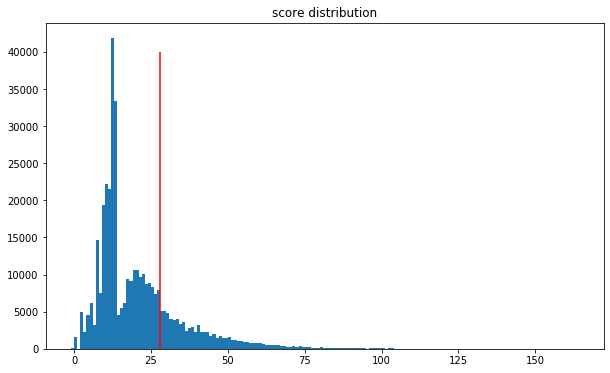

In [41]:
plt.figure(figsize=(10,6))
plt.hist(restaurants['score'], bins = int(max(restaurants['score']) - min(restaurants['score'])))
plt.vlines(x = 28, ymin =0, ymax = 40000, color = 'r')
plt.title('score distribution')
plt.show()

In [46]:
cuisine_dummies = pd.get_dummies(restaurants['cuisine_description'])

In [48]:
from sklearn.linear_model import LinearRegression
X = cuisine_dummies
X = X.fillna(X.mean(), inplace=True)
y = restaurants['score']
reg = LinearRegression().fit(X, y)
reg.coef_

ValueError: Expected 2D array, got scalar array instead:
array=None.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [50]:
X